In [1]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from citipy import citipy
import requests 
from config import weather_api_key
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lats and lngs combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


636

In [5]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval             ")
print("-------------------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city info into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found.  Skipping...")
        pass

# Indicate that Data loading is complete.
print("-------------------------------------")
print("Data Retrieval Complete              ")
print("-------------------------------------")


et 4 | muana
Processing Record 40 of Set 4 | honningsvag
Processing Record 41 of Set 4 | nyurba
Processing Record 42 of Set 4 | libreville
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | kandrian
Processing Record 45 of Set 4 | gweta
Processing Record 46 of Set 4 | marcona
City not found.  Skipping...
Processing Record 47 of Set 4 | curtuiseni
City not found.  Skipping...
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | bloemfontein
Processing Record 50 of Set 4 | vestmannaeyjar
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | quatre cocos
Processing Record 3 of Set 5 | bagdarin
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | bengkulu
City not found.  Skipping...
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | stephenville
Processing Record 9 of Set 5 | boa vista
Processing Record 10 of Set 5 | artyk
City not found.  Skipping...
Proces

In [7]:
# Check number of city with data
len(city_data)


564

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nizwa,22.93,57.53,69.87,41,61,7.09,OM,2020-01-05 09:28:47
1,Albany,42.65,-73.75,35.60,59,90,19.46,US,2020-01-05 09:28:48
2,Severo-Kurilsk,50.68,156.12,18.23,88,100,8.72,RU,2020-01-05 09:28:48
3,Namibe,-15.19,12.15,73.40,88,90,5.03,AO,2020-01-05 09:28:49
4,Santa Cruz,-6.22,-36.02,72.34,88,79,2.44,BR,2020-01-05 09:28:49
5,Dingle,11.00,122.67,77.54,87,12,13.18,PH,2020-01-05 09:28:49
6,Chuy,-33.69,-53.46,64.98,87,0,6.60,UY,2020-01-05 09:28:50
7,Kapaa,22.08,-159.32,75.20,88,90,18.34,US,2020-01-05 09:27:51
8,Hofn,64.25,-15.21,43.18,80,54,36.60,IS,2020-01-05 09:28:51
9,Tsalka,41.60,44.09,29.75,52,11,1.25,GE,2020-01-05 09:28:51


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nizwa,OM,2020-01-05 09:28:47,22.93,57.53,69.87,41,61,7.09
1,Albany,US,2020-01-05 09:28:48,42.65,-73.75,35.60,59,90,19.46
2,Severo-Kurilsk,RU,2020-01-05 09:28:48,50.68,156.12,18.23,88,100,8.72
3,Namibe,AO,2020-01-05 09:28:49,-15.19,12.15,73.40,88,90,5.03
4,Santa Cruz,BR,2020-01-05 09:28:49,-6.22,-36.02,72.34,88,79,2.44
5,Dingle,PH,2020-01-05 09:28:49,11.00,122.67,77.54,87,12,13.18
6,Chuy,UY,2020-01-05 09:28:50,-33.69,-53.46,64.98,87,0,6.60
7,Kapaa,US,2020-01-05 09:27:51,22.08,-159.32,75.20,88,90,18.34
8,Hofn,IS,2020-01-05 09:28:51,64.25,-15.21,43.18,80,54,36.60
9,Tsalka,GE,2020-01-05 09:28:51,41.60,44.09,29.75,52,11,1.25


In [10]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv file
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [12]:
# import time dependency
import time 


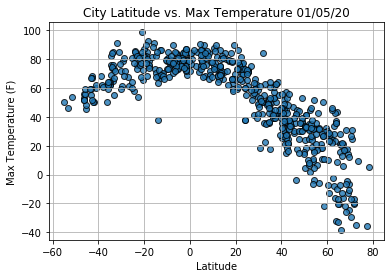

In [13]:
# Build the scatter plot for lats vs max temp
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()



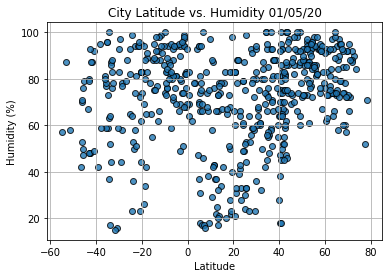

In [14]:
# Build the scatter plot for lats vs humidity
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()



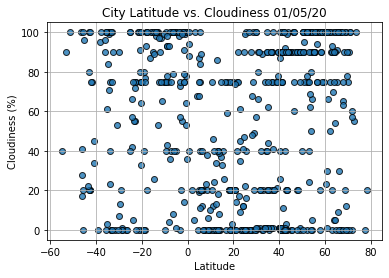

In [15]:
# Build the scatter plot for lats vs cloudiness
plt.scatter(lats, cloudiness, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()


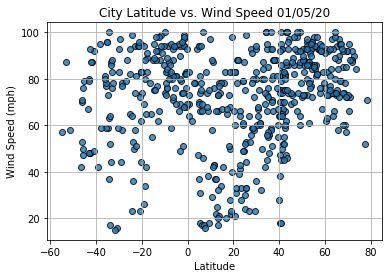

In [16]:
# Build the scatter plot for lats vs wind speed
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()


In [17]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress


In [18]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Caculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [20]:
northern_hemi_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nizwa,OM,2020-01-05 09:28:47,22.93,57.53,69.87,41,61,7.09
1,Albany,US,2020-01-05 09:28:48,42.65,-73.75,35.60,59,90,19.46
2,Severo-Kurilsk,RU,2020-01-05 09:28:48,50.68,156.12,18.23,88,100,8.72
5,Dingle,PH,2020-01-05 09:28:49,11.00,122.67,77.54,87,12,13.18
7,Kapaa,US,2020-01-05 09:27:51,22.08,-159.32,75.20,88,90,18.34
8,Hofn,IS,2020-01-05 09:28:51,64.25,-15.21,43.18,80,54,36.60
9,Tsalka,GE,2020-01-05 09:28:51,41.60,44.09,29.75,52,11,1.25
11,Broome,GB,2020-01-05 09:28:52,52.47,1.45,45.00,87,75,8.05
12,Saint-Augustin,CA,2020-01-05 09:28:53,45.63,-73.98,28.99,73,90,3.36
14,Tasiilaq,GL,2020-01-05 09:28:54,65.61,-37.64,28.40,58,100,4.65


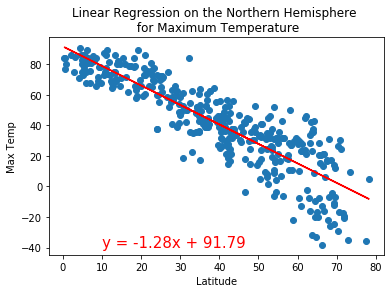

LinregressResult(slope=-1.2769611195327475, intercept=91.78505849103712, rvalue=-0.8742733566194845, pvalue=7.65144562935128e-124, stderr=0.035995208556525174)

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,-40))
linregress(x_values, y_values)


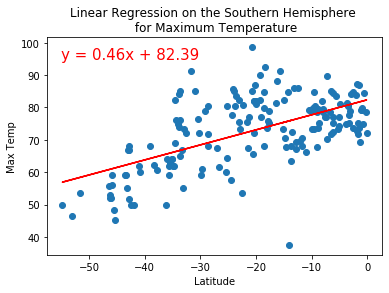

LinregressResult(slope=0.46442455439173835, intercept=82.38577292177374, rvalue=0.600499260018918, pvalue=1.9824223275430362e-18, stderr=0.04715470214240577)

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-55,95))
linregress(x_values, y_values)



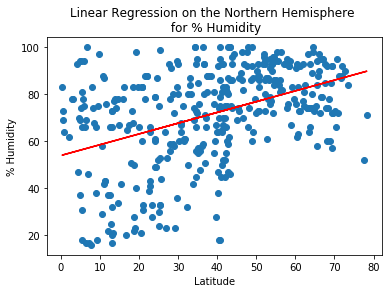

LinregressResult(slope=0.45784046830487846, intercept=53.995711172746645, rvalue=0.42981287058348133, pvalue=5.764007376027641e-19, stderr=0.04882780530491665)

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (40,10))
linregress(x_values, y_values)


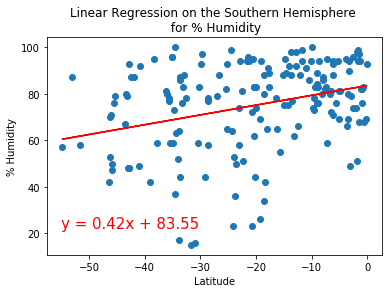

LinregressResult(slope=0.42107279804169073, intercept=83.5450751539013, rvalue=0.3141640262035101, pvalue=2.4254619248886583e-05, stderr=0.09702226892870294)

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-55,22))
linregress(x_values, y_values)


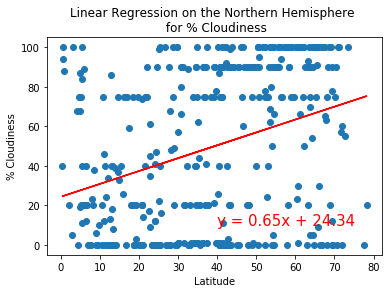

LinregressResult(slope=0.6514829016237177, intercept=24.342743179670734, rvalue=0.31911205268783777, pvalue=1.1099451125325362e-10, stderr=0.09822513156528201)

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (40,10))
linregress(x_values, y_values)


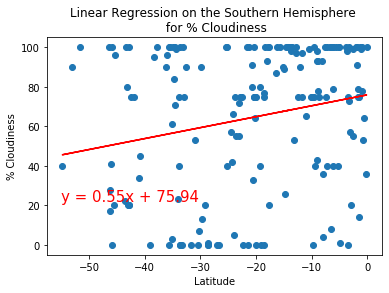

LinregressResult(slope=0.5534400098062663, intercept=75.93703856597027, rvalue=0.21707575312785285, pvalue=0.0040125172115265785, stderr=0.18976394016931186)

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-55,22))
linregress(x_values, y_values)


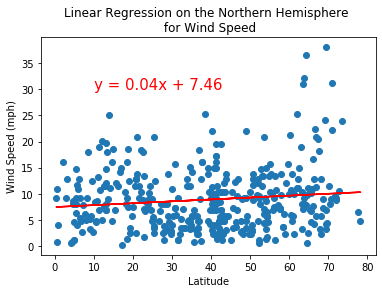

LinregressResult(slope=0.036399424281207626, intercept=7.455818700647761, rvalue=0.11879453658008068, pvalue=0.018935952065800288, stderr=0.015445285593902704)

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (10,30))
linregress(x_values, y_values)


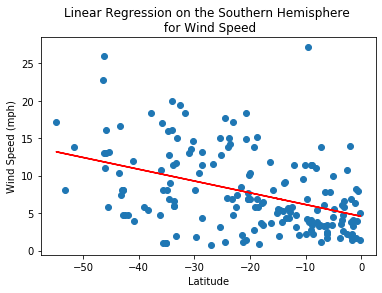

LinregressResult(slope=-0.1572476346252845, intercept=4.564649739222811, rvalue=-0.4219863303521791, pvalue=6.6539746853888535e-09, stderr=0.025759550505784157)

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (-55,30))
linregress(x_values, y_values)

